In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.imputation import RandomSampleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('Train.csv')

# Dataset exploration

In [3]:
df.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
7185           DRF15       18.350          Low Fat         0.033214     Dairy   
4549           DRI39       13.800          Low Fat         0.097611     Dairy   
166            FDP25       15.200          Low Fat         0.021327    Canned   
3716           FDS37        7.655          Low Fat         0.032126    Canned   
1797           FDS15        9.195          Regular         0.078219      Meat   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
7185  154.9340            OUT046                       1997       Small   
4549   54.8930            OUT017                       2007         NaN   
166   216.8824            OUT017                       2007         NaN   
3716  115.7492            OUT017                       2007         NaN   
1797  107.6596            OUT045                       2002         NaN   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7185               Tier 1  Supermarket Type1          1225.0720  
4549               Tier 2  Supermarket Type1           679.1160  
166                Tier 2  Supermarket Type1          2838.9712  
3716               Tier 2  Supermarket Type1          2548.6824  
1797               Tier 2  Supermarket Type1           323.5788

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe().T

count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

C:\Users\deves\AppData\Local\Temp\ipykernel_17648\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

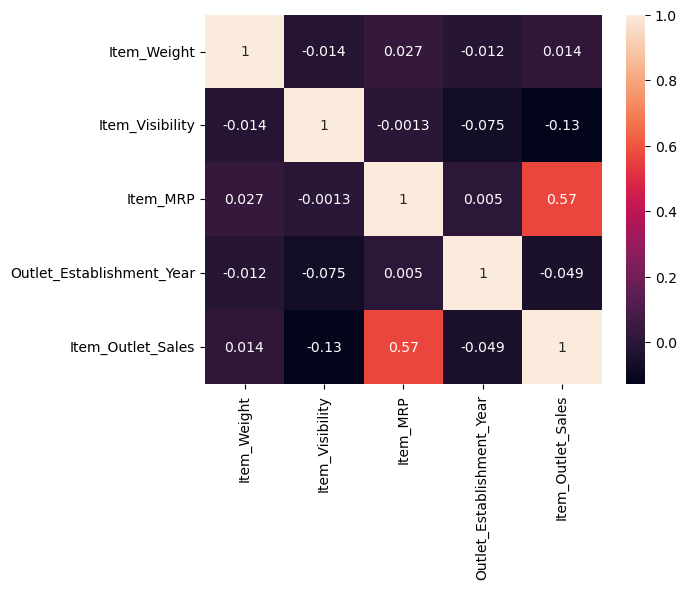

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: xlabel='Count', ylabel='Item_Type'>

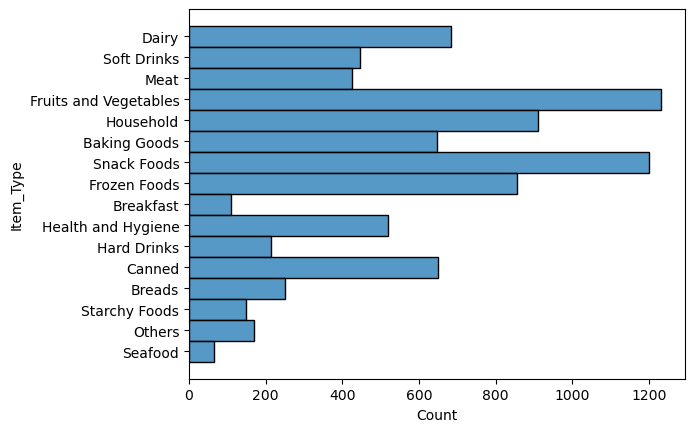

In [11]:
sns.histplot(df,y='Item_Type')

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [14]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

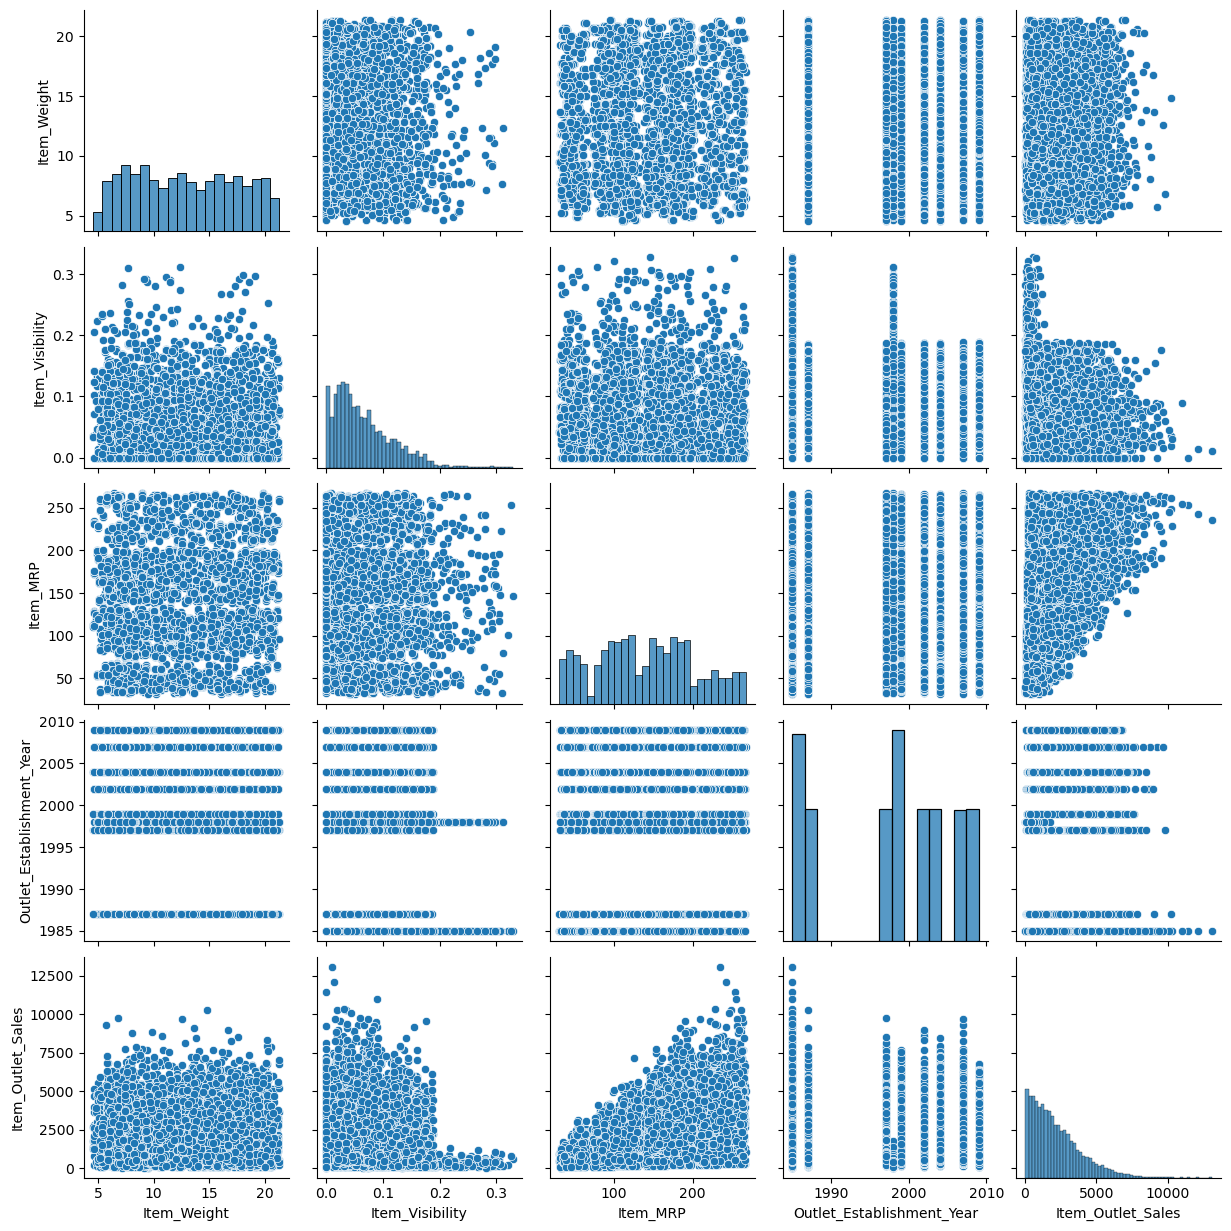

In [16]:
sns.pairplot(df)

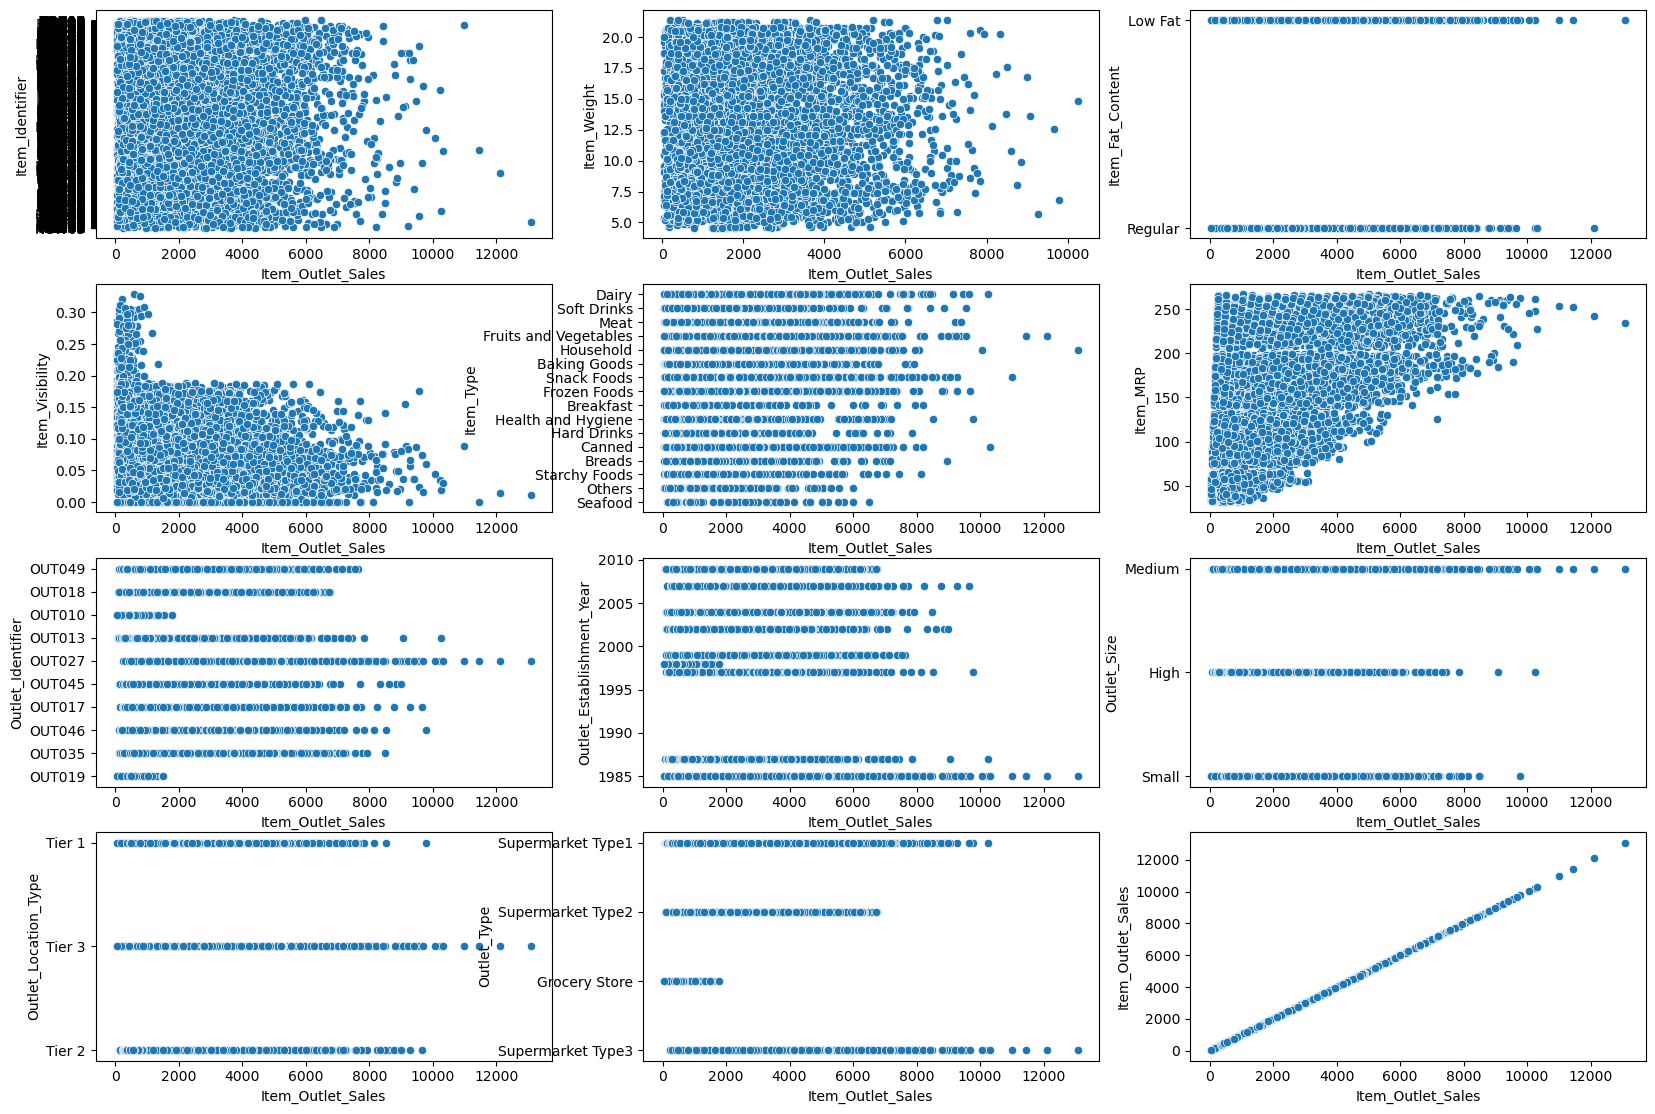

In [17]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df):
    plt.subplot(10,3,i+1)
    sns.scatterplot(df,x='Item_Outlet_Sales',y=col)

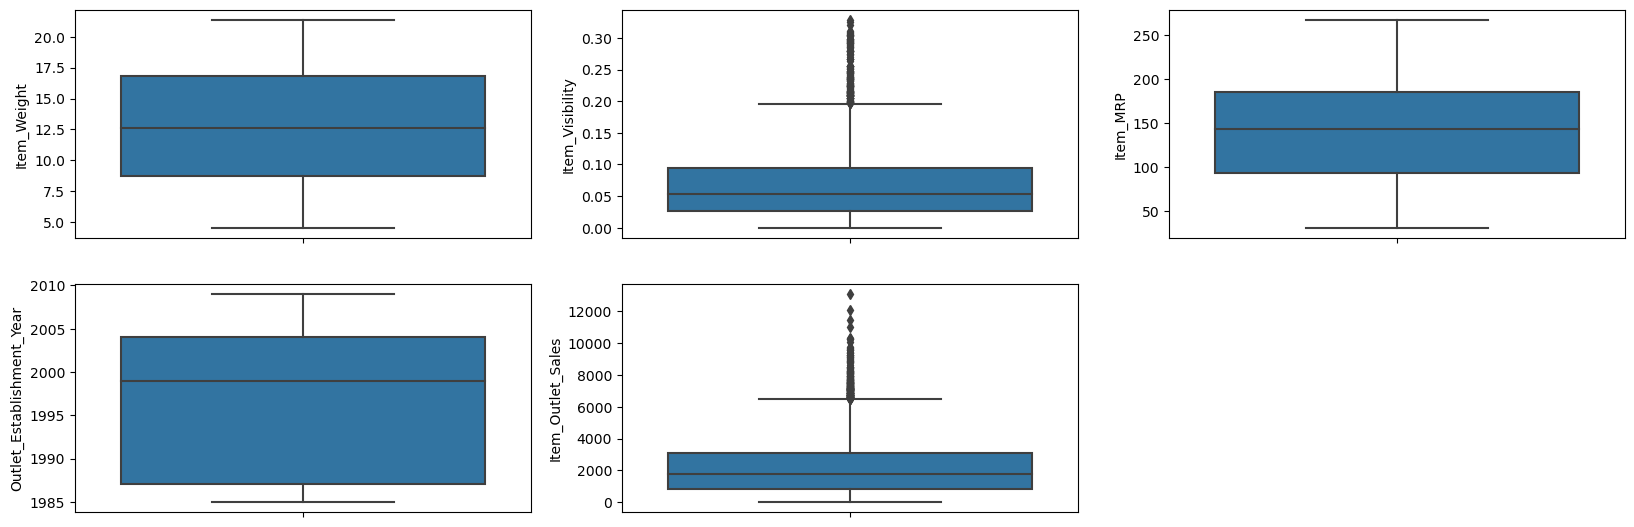

In [18]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.boxplot(df,y=col)

In [19]:
df[df['Item_Weight'].isnull()]


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [20]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [21]:
df=df.drop('Item_Identifier',axis=1)

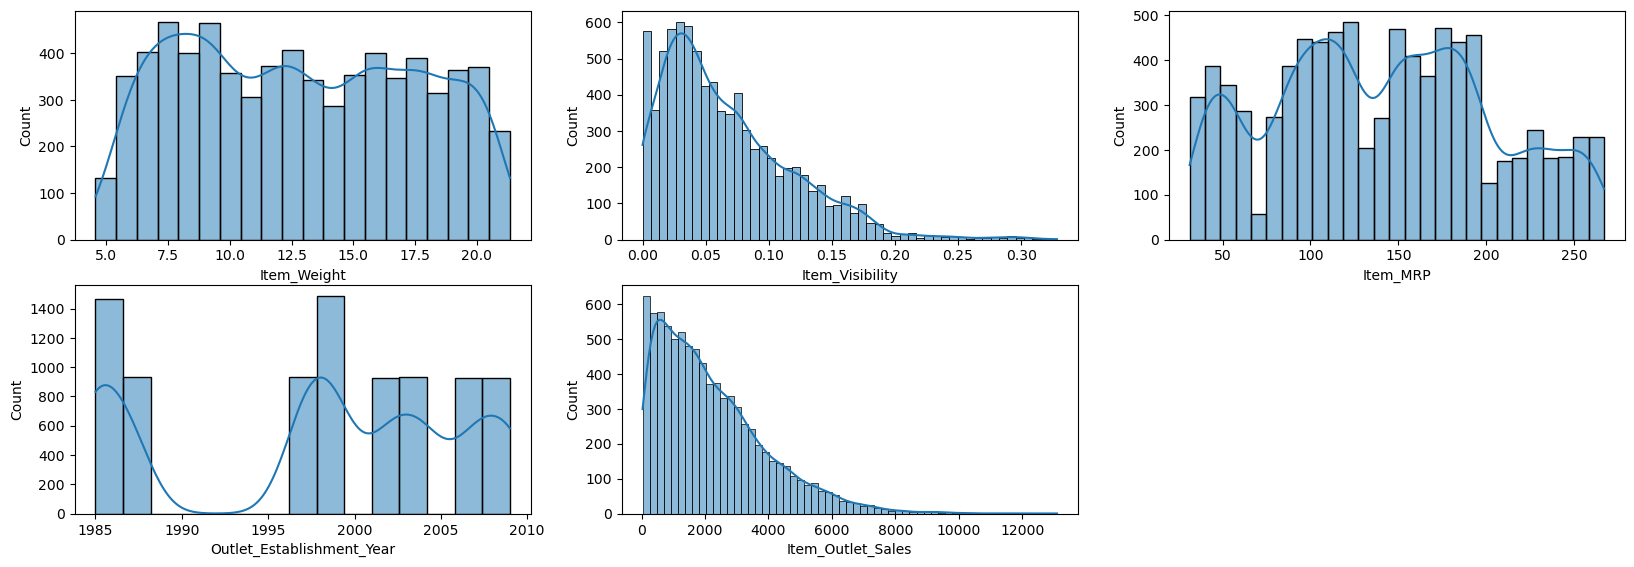

In [22]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.histplot(df,x=col,kde=True)

In [23]:
df.skew()

C:\Users\deves\AppData\Local\Temp\ipykernel_17648\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [24]:
for i in df.select_dtypes(exclude='object'):
    df[i]=np.log1p(df[i])
    

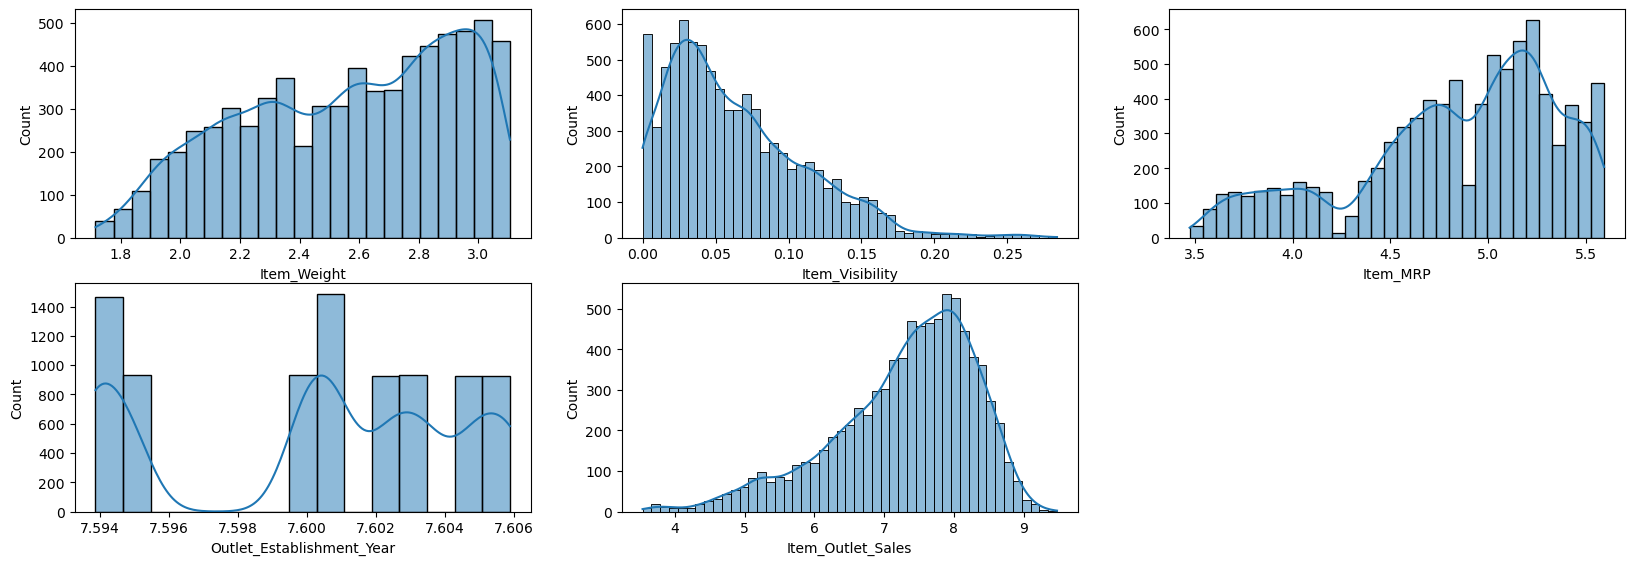

In [25]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.histplot(df,x=col,kde=True)

In [26]:
df.skew()

C:\Users\deves\AppData\Local\Temp\ipykernel_17648\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                 -0.348430
Item_Visibility              1.015334
Item_MRP                    -0.726014
Outlet_Establishment_Year   -0.400638
Item_Outlet_Sales           -0.882266
dtype: float64

# Outliers Removal

In [27]:
for col in df.select_dtypes(exclude='object'):
    data=df[col]
    
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    IQR=Q3-Q1
    Min=Q1-(1.5*IQR)
    Max=Q3+(1.5*IQR)
    
    Outliers= ((data > Max) | (data < Min))
    
    df.loc[Outliers,col]=np.nan
    

In [28]:
df=pd.get_dummies(df,drop_first=True)

In [29]:
knn_imp = KNNImputer(n_neighbors=3,weights='distance')

In [30]:
df=pd.DataFrame(knn_imp.fit_transform(df),columns=df.columns)

In [31]:
df

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        2.332144         0.015920  5.524692                   7.600902   
1        1.934416         0.019095  3.897299                   7.605890   
2        2.917771         0.016621  4.960170                   7.600902   
3        3.005683         0.000000  5.210005                   7.600402   
4        2.295560         0.000000  4.004810                   7.594884   
...           ...              ...       ...                        ...   
8518     2.062423         0.055230  5.373062                   7.594884   
8519     2.238580         0.045912  4.692787                   7.602401   
8520     2.451005         0.034581  4.455770                   7.603399   
8521     2.105353         0.135597  4.645671                   7.605890   
8522     2.760010         0.043900  4.336859                   7.599902   

      Item_Outlet_Sales  Item_Fat_Content_Regular  Item_Type_Breads  \
0              8.225808                       0.0               0.0   
1              6.096776                       1.0               0.0   
2              7.648868                       0.0               0.0   
3              6.597664                       1.0               0.0   
4              6.903451                       0.0               0.0   
...                 ...                       ...               ...   
8518           7.929984                       0.0               0.0   
8519           6.310436                       1.0               0.0   
8520           7.085159                       0.0               0.0   
8521           7.521100                       1.0               0.0   
8522           6.642056                       0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0                     0.0               0.0              1.0  ...   
1                     0.0               0.0              0.0  ...   
2                     0.0               0.0              0.0  ...   
3                     0.0               0.0              0.0  ...   
4                     0.0               0.0              0.0  ...   
...                   ...               ...              ...  ...   
8518                  0.0               0.0              0.0  ...   
8519                  0.0               0.0              0.0  ...   
8520                  0.0               0.0              0.0  ...   
8521                  0.0               0.0              0.0  ...   
8522                  0.0               0.0              0.0  ...   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
8518                       0.0                       0.0   
8519                       1.0                       0.0   
8520                       0.0                       0.0   
8521                       0.0                       0.0   
8522                       0.0                       1.0   

      Outlet_Identifier_OUT049  Outlet_Size_Medium  Outlet_Size_Small  \
0                          1.0                 1.0                0.0   
1                          0.0                 1.0                0.0   
2                          1.0                 1.0                0.0   
3                          0.0                 0.0                0.0   
4                          0.0                 0.0                0.0   
...                        ...                 ...                ...   
8518                       0.0                 0.0                0.0   
8519                       0.0                 0.0                0.0   
8520                       0.0               

In [32]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermark

In [33]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [34]:
X = MinMaxScaler().fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Data Modeling

In [36]:
ridge=Ridge(alpha=1).fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
linear=LinearRegression().fit(X_train,y_train)

In [37]:
models=[ridge,lasso,enet,linear]
for i in models:
    print('Accuracy Score for',i,i.score(X_train,y_train))

Accuracy Score for Ridge(alpha=1) 0.7200172900447637
Accuracy Score for Lasso() 0.0
Accuracy Score for ElasticNet() 0.0
Accuracy Score for LinearRegression() 0.7200202928609409


In [38]:
y_pred=linear.predict(X_test)
print('Linear R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Linear R2 0.6081223174498109
MAE is: 0.40264005826699417


In [39]:
y_pred=ridge.predict(X_test)
print('Ridge R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Ridge R2 0.6067603640767398
MAE is: 0.4026544497708218


In [40]:
y_pred=enet.predict(X_test)
print('Elastic net R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Elastic net R2 -1.1503437618753933e+30
MAE is: 0.7652562096174632


In [41]:
y_pred=lasso.predict(X_test)
print('Lasso R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Lasso R2 -1.1503437618753933e+30
MAE is: 0.7652562096174632


In [42]:
rfg=RandomForestRegressor().fit(X_train,y_train)
print('Accuracy Score for',rfg.score(X_train,y_train))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Accuracy Score for 0.9575033007073244
MAE is: 0.7652562096174632


In [43]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=7)
xgb=xgb_model.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('XGB R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

XGB R2 0.5845763170095042
MAE is: 0.4185937292339079


In [44]:
pca=PCA()
df_pca=pca.fit_transform(df)

In [45]:
df_pca=pd.DataFrame(df_pca,columns=df.columns)

In [46]:
df_pca


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0       -1.154364         0.129319  0.048058                  -0.201885   
1        1.474769         1.369833 -0.394310                   0.624820   
2       -0.457096         0.129638 -0.150010                  -0.137567   
3        0.703559         0.587029  0.167147                   0.637218   
4        0.646199         0.177629 -0.484126                  -0.638123   
...           ...              ...       ...                        ...   
8518    -0.710314         0.192662 -0.006475                  -0.386092   
8519     0.887167        -0.812482 -0.773091                   0.590054   
8520     0.318031        -1.107819  0.163055                  -0.426385   
8521    -0.075798         1.392930 -0.078497                   0.693318   
8522     0.851652        -0.676653  0.709188                  -0.328384   

      Item_Outlet_Sales  Item_Fat_Content_Regular  Item_Type_Breads  \
0              0.734304                  0.480070         -0.670959   
1              0.164922                 -0.410759         -0.586843   
2              0.944521                  0.516750         -0.524947   
3             -0.826784                  0.041291          0.035621   
4             -0.316846                  1.015466          0.328647   
...                 ...                       ...               ...   
8518          -0.884825                  0.878607         -0.004975   
8519          -0.211589                 -0.246716          0.001538   
8520           0.273907                 -0.500935          0.246789   
8521          -0.125622                 -0.478962         -0.747943   
8522           0.476180                  0.434510          0.108562   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0               -0.687997          0.039184        -0.170382  ...   
1                0.872623          0.159056        -0.444745  ...   
2               -0.476923         -0.056918         0.149771  ...   
3               -0.464280         -0.749255         0.428179  ...   
4                0.664612          0.041374        -0.126990  ...   
...                   ...               ...              ...  ...   
8518             0.018444          0.780406         0.392762  ...   
8519            -0.318515          0.084831        -0.310620  ...   
8520             0.598273          0.000373         0.178235  ...   
8521             0.620268          0.774243         0.215124  ...   
8522             0.439196         -0.044099        -0.145102  ...   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                     0.003475                 -0.047093   
1                     0.038577                 -0.040568   
2                     0.006027                 -0.034578   
3                     0.007725                 -0.083149   
4                     0.018028                 -0.053955   
...                        ...                       ...   
8518                  0.003007                 -0.002511   
8519                 -0.195752                 -0.016912   
8520                  0.017963                 -0.015237   
8521                  0.017577                  0.074090   
8522                  0.018280                 -0.011450   

      Outlet_Identifier_OUT049  Outlet_Size_Medium  Outlet_Size_Small  \
0                 4.546864e-15        9.926933e-17      -1.922924e-16   
1                -2.030969e-15       -3.596962e-16       9.137349e-17   
2                -1.459402e-15       -1.215864e-17      -8.060781e-17   
3                 1.441491e-14       -1.081866e-15       6.661920e-16   
4                 4.673795e-15        8.041906e-17      -8.633587e-16   
...                        ...                 ...                ...   
8518              2.962394e-16        2.949685e-17       1.730079e-17   
8519              9.203698e-16        3.821303e-18      -9.202738e-18   
8520              5.081200e-16        3.09103

In [47]:
import plotly.express as px
px.area(
    x=range(1, pca.explained_variance_ratio_.cumsum().shape[0] + 1),
    y=pca.explained_variance_ratio_.cumsum(),
    labels={"x": "# Components", "y": "Cumulative Variance"}
)

In [48]:
px.bar(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=pca.explained_variance_ratio_,labels={"x": "# Components", "y": "Explained Variance"}
)

In [49]:
pca = PCA(n_components = 16 )

df_pca = pca.fit_transform(df)
df_pca

array([[-1.15436376,  0.1293193 ,  0.04805841, ...,  0.04012862,
         0.62421032, -0.62985924],
       [ 1.47476918,  1.36983261, -0.39431029, ..., -0.17204817,
         0.04522646, -0.08454946],
       [-0.45709564,  0.12963837, -0.15001009, ...,  0.02283515,
         0.1670723 ,  0.10667102],
       ...,
       [ 0.31803091, -1.10781859,  0.16305492, ...,  0.1952174 ,
         0.24915881,  0.10588358],
       [-0.0757978 ,  1.39292994, -0.07849747, ..., -0.11920068,
        -0.17791882, -0.11569888],
       [ 0.85165164, -0.67665327,  0.7091878 , ...,  0.0626482 ,
         0.16929879,  0.06078336]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 7)

In [51]:
ridge=Ridge(alpha=0.1).fit(X_train,y_train)
lasso=Lasso(alpha=0.1).fit(X_train,y_train)
enet=ElasticNet(l1_ratio=0.1).fit(X_train,y_train)
linear=LinearRegression().fit(X_train,y_train)

In [52]:
models=[ridge,lasso,enet,linear]
for i in models:
    print('Accuracy Score for',i,i.score(X_train,y_train))

Accuracy Score for Ridge(alpha=0.1) 0.9952918007916227
Accuracy Score for Lasso(alpha=0.1) 0.9748721004437471
Accuracy Score for ElasticNet(l1_ratio=0.1) 0.7274284661463374
Accuracy Score for LinearRegression() 0.9952918010459999


In [53]:
rfg=RandomForestRegressor().fit(X_train,y_train)
print('Accuracy Score for',rfg.score(X_train,y_train))

Accuracy Score for 0.9997678986459085


In [54]:
y_pred=linear.predict(X_test)
print('Linear R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Linear R2 0.9947438818273476
MAE is: 0.05051686371003025


In [55]:
y_pred=ridge.predict(X_test)
print('Ridge R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))


Ridge R2 0.9947437806441107
MAE is: 0.05051791502552382


In [56]:
y_pred=enet.predict(X_test)
print('Elastic net R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Elastic net R2 -0.14732197595757768
MAE is: 0.3979099351901393


In [57]:
y_pred=lasso.predict(X_test)
print('Lasso R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Lasso R2 0.9684439574227419
MAE is: 0.11876594209574239


In [58]:
y_pred=rfg.predict(X_test)
print('RFG R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

RFG R2 0.9980789525157152
MAE is: 0.026899078398395004


In [59]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=7)

In [60]:
xgb=xgb_model.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('XGB R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

XGB R2 0.9991008126306917
MAE is: 0.020594870234997398


In [61]:
params_space={
    'n_estimators':[100,200,500,300,400],'max_depth':[3,5,6,9,10],'gamma':[0.01,0.1],'learning_rate':[0.001,0.01,0.1,1]
}

In [62]:
GS=GridSearchCV(estimator=xgb_model,param_grid=params_space,scoring=['r2','neg_root_mean_squared_error'],refit='r2',cv=5,verbose=1
)

In [63]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=7, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 6, 9, 10],
                         'n_estimators': [100, 200, 500, 300, 400]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=1)

In [64]:
print(GS.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=7, ...)


In [65]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [66]:
print(GS.best_score_)

0.9991654205662547


In [67]:
param_df=pd.DataFrame(GS.cv_results_)

In [68]:
param_df.sort_values('rank_test_r2')

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
70        0.630957      0.009973         0.002606        0.000588        0.01   
71        1.409444      0.022251         0.002404        0.000376        0.01   
74        2.989601      0.053326         0.003104        0.000586        0.01   
73        2.189565      0.047021         0.002904        0.000803        0.01   
72        3.834061      0.116148         0.003205        0.000680        0.01   
..             ...           ...              ...             ...         ...   
5         0.270861      0.011055         0.002600        0.000489        0.01   
115       0.270938      0.010571         0.002101        0.000203         0.1   
110       0.280641      0.017428         0.002602        0.000798         0.1   
15        0.263300      0.006207         0.002202        0.000400        0.01   
0         0.205388      0.003589         0.002814        0.000510        0.01   

    param_learning_rate param_max_depth param_n_estimators  \
70                  0.1              10                100   
71                  0.1              10                200   
74                  0.1              10                400   
73                  0.1              10                300   
72                  0.1              10                500   
..                  ...             ...                ...   
5                 0.001               5                100   
115               0.001               9                100   
110               0.001               6                100   
15                0.001               9                100   
0                 0.001               3                100   

                                                params  split0_test_r2  ...  \
70   {'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...        0.999214  ...   
71   {'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...        0.999214  ...   
74   {'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...        0.999214  ...   
73   {'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...        0.999214  ...   
72   {'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...        0.999214  ...   
..                                                 ...             ...  ...   
5    {'gamma': 0.01, 'learning_rate': 0.001, 'max_d...      -44.453632  ...   
115  {'gamma': 0.1, 'learning_rate': 0.001, 'max_de...      -44.453632  ...   
110  {'gamma': 0.1, 'learning_rate': 0.001, 'max_de...      -44.453632  ...   
15   {'gamma': 0.01, 'learning_rate': 0.001, 'max_d...      -44.453632  ...   
0    {'gamma': 0.01, 'learning_rate': 0.001, 'max_d...      -44.453632  ...   

     std_test_r2  rank_test_r2  split0_test_neg_root_mean_squared_error  \
70      0.000035             1                                -0.025986   
71      0.000035             2                                -0.025988   
74      0.000035             2                                -0.025988   
73      0.000035             2                                -0.025988   
72      0.000035             2                                -0.025988   
..           ...           ...                                      ...   
5       2.098383           191                                -6.250409   
115     2.098383           191                                -6.250409   
110     2.098383           191                                -6.250409   
15      2.098383           191                                -6.250409   
0       2.098383           191                                -6.250409   

     split1_test_neg_root_mean_squared_error  \
70                                 -0.027842   
71                                 -0.027834   
74                                 -0.027834   
73                                 -0.027834   
72                                 -0.027834   
..                                       ...   
5                                  -6.265524   
115                                -6.265524   
110  

# Random Forest Reg

In [69]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','friedman_mse'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [70]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5,verbose=1)


In [71]:
reg.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]},
             verbose=1)

In [72]:
print(reg.best_estimator_)

DecisionTreeRegressor(max_depth=4, max_features=1.0, min_samples_split=0.25)


In [73]:
print(reg.best_params_)

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 0.25}


In [74]:
print(reg.best_score_)

0.9399268924129979


In [75]:
import pickle
pickle.dump(xgb_model,open('pipe.pkl','wb'))

In [76]:
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [-1, None],
              'positive': [True, False]}

In [77]:
random_search = RandomizedSearchCV(linear, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [-1, None],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
print("Best Parameters:", random_search.best_params_)
print("Test Scores:", random_search.best_params_)

Best Parameters: {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
Test Scores: {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}


In [79]:
best_model = random_search.best_estimator_

In [80]:
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.9947532726874839


In [ ]:
git clone <forked_repository_url>